In this project we will analyze two datasets. First will be results of political polls. We will try to answer the following questions:
    
    1. who was being polled and what was their party affiliation?
    2. Did the poll results favor Romney or Obama?
    3. How do undecided voters effect the poll?
    4. Can we account for the undecided voters?
    5. How did voter sentiment change over time?
    6. Can we see an effect in the polls from the debate?
    
    We will explore another dataset later on

In [1]:
#For data
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

#For visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

Data for polls will be obtained from Huffpost pollster. Website - https://elections.huffingtonpost.com/pollster/2012-general-election-romney-vs-obama.

We are going to use requests module to import some data form the web. We will also use string IO to work with csv data we get from Huffpost. it provided convenient method to work with text in memory using file API.

In [3]:
#use to grab data from web
import requests

#To work with csv file. it will require a.read() method
from io import StringIO

In [4]:
url = "https://elections.huffingtonpost.com/pollster/2012-general-election-romney-vs-obama.csv"

source = requests.get(url).text

poll_data = StringIO(source)

In [5]:
poll_df = pd.read_csv(poll_data)

In [6]:
poll_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 586 entries, 0 to 585
Data columns (total 17 columns):
Pollster                  586 non-null object
Start Date                586 non-null object
End Date                  586 non-null object
Entry Date/Time (ET)      586 non-null object
Number of Observations    564 non-null float64
Population                586 non-null object
Mode                      586 non-null object
Obama                     586 non-null float64
Romney                    586 non-null float64
Undecided                 423 non-null float64
Other                     202 non-null float64
Pollster URL              586 non-null object
Source URL                584 non-null object
Partisan                  586 non-null object
Affiliation               586 non-null object
Question Text             0 non-null float64
Question Iteration        586 non-null int64
dtypes: float64(6), int64(1), object(10)
memory usage: 77.9+ KB


In [7]:
poll_df.head()

,Pollster,Start Date,End Date,Entry Date/Time (ET),Number of Observations,Population,Mode,Obama,Romney,Undecided,Other,Pollster URL,Source URL,Partisan,Affiliation,Question Text,Question Iteration
0,Politico/GWU/Battleground,2012-11-04,2012-11-05,2012-11-06T08:40:26Z,1000.0,Likely Voters,Live Phone,47.0,47.0,6.0,NaN,http://elections.huffingtonpost.com/pollster/p...,http://www.politico.com/news/stories/1112/8338...,Nonpartisan,None,NaN,1
1,YouGov/Economist,2012-11-03,2012-11-05,2012-11-26T15:31:23Z,740.0,Likely Voters,Internet,49.0,47.0,3.0,NaN,http://elections.huffingtonpost.com/pollster/p...,http://cdn.yougov.com/cumulus_uploads/document...,Nonpartisan,None,NaN,1
2,Gravis Marketing,2012-11-03,2012-11-05,2012-11-06T09:22:02Z,872.0,Likely Voters,Automated Phone,48.0,48.0,4.0,NaN,http://elections.huffingtonpost.com/pollster/p...,http://www.gravispolls.com/2012/11/gravis-mark...,Nonpartisan,None,NaN,1
3,IBD/TIPP,2012-11-03,2012-11-05,2012-11-06T08:51:48Z,712.0,Likely Voters,Live Phone,50.0,49.0,NaN,1.0,http://elections.huffingtonpost.com/pollster/p...,http://news.investors.com/special-report/50841...,Nonpartisan,None,NaN,1
4,Rasmussen,2012-11-03,2012-11-05,2012-11-06T08:47:50Z,1500.0,Likely Voters,Automated Phone,48.0,49.0,NaN,NaN,http://elections.huffingtonpost.com/pollster/p...,http://www.rasmussenreports.com/public_content...,Nonpartisan,None,NaN,1


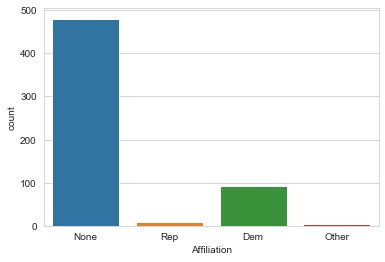

In [21]:
sns.countplot('Affiliation',data=poll_df)

From the graph above as you can see, close to 480 people did not affliate themselves with either democrats or republican party. and a few others, close to 100 identified themselves as democrats.

In [22]:
poll_df.Affiliation.value_counts()

None     480
Dem       93
Rep        9
Other      4
Name: Affiliation, dtype: int64

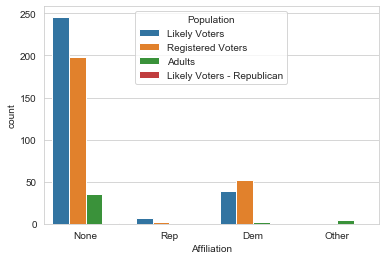

In [12]:
sns.countplot('Affiliation',data=poll_df,hue='Population')

From the above graph, a vast majority were likely voters, close to 200 were registered voters and there were more democratic voters than republicans.

In [23]:
poll_df.Population.value_counts()

Likely Voters                 292
Registered Voters             252
Adults                         41
Likely Voters - Republican      1
Name: Population, dtype: int64

In [14]:
avg = pd.DataFrame(poll_df.mean())
avg.drop('Number of Observations', axis=0, inplace=True)
avg.head()

,0
Obama,46.805461
Romney,44.614334
Undecided,6.550827
Other,3.376238
Question Text,NaN


In [15]:
std = pd.DataFrame(poll_df.std())
std.drop('Number of Observations', axis=0, inplace=True)
std.head()

,0
Obama,2.422058
Romney,2.906180
Undecided,3.701754
Other,2.692726
Question Text,NaN


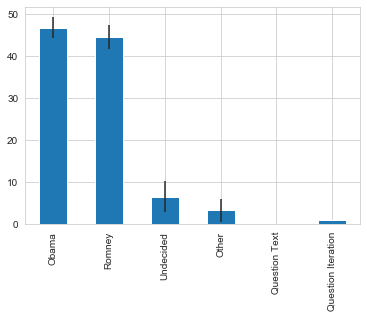

In [17]:
avg.plot(yerr=std,kind='bar',legend=False)

In [18]:
poll_avg = pd.concat([avg,std],axis=1)
poll_avg.head()

,0,0
Obama,46.805461,2.422058
Romney,44.614334,2.906180
Undecided,6.550827,3.701754
Other,3.376238,2.692726
Question Text,NaN,NaN


In [19]:
poll_avg.columns = ['Average','STD']
poll_avg

,Average,STD
Obama,46.805461,2.422058
Romney,44.614334,2.906180
Undecided,6.550827,3.701754
Other,3.376238,2.692726
Question Text,NaN,NaN
Question Iteration,1.000000,0.000000


In [24]:
poll_df.head()

,Pollster,Start Date,End Date,Entry Date/Time (ET),Number of Observations,Population,Mode,Obama,Romney,Undecided,Other,Pollster URL,Source URL,Partisan,Affiliation,Question Text,Question Iteration
0,Politico/GWU/Battleground,2012-11-04,2012-11-05,2012-11-06T08:40:26Z,1000.0,Likely Voters,Live Phone,47.0,47.0,6.0,NaN,http://elections.huffingtonpost.com/pollster/p...,http://www.politico.com/news/stories/1112/8338...,Nonpartisan,None,NaN,1
1,YouGov/Economist,2012-11-03,2012-11-05,2012-11-26T15:31:23Z,740.0,Likely Voters,Internet,49.0,47.0,3.0,NaN,http://elections.huffingtonpost.com/pollster/p...,http://cdn.yougov.com/cumulus_uploads/document...,Nonpartisan,None,NaN,1
2,Gravis Marketing,2012-11-03,2012-11-05,2012-11-06T09:22:02Z,872.0,Likely Voters,Automated Phone,48.0,48.0,4.0,NaN,http://elections.huffingtonpost.com/pollster/p...,http://www.gravispolls.com/2012/11/gravis-mark...,Nonpartisan,None,NaN,1
3,IBD/TIPP,2012-11-03,2012-11-05,2012-11-06T08:51:48Z,712.0,Likely Voters,Live Phone,50.0,49.0,NaN,1.0,http://elections.huffingtonpost.com/pollster/p...,http://news.investors.com/special-report/50841...,Nonpartisan,None,NaN,1
4,Rasmussen,2012-11-03,2012-11-05,2012-11-06T08:47:50Z,1500.0,Likely Voters,Automated Phone,48.0,49.0,NaN,NaN,http://elections.huffingtonpost.com/pollster/p...,http://www.rasmussenreports.com/public_content...,Nonpartisan,None,NaN,1


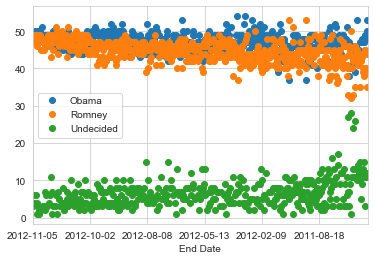

In [25]:
poll_df.plot(x='End Date',y=['Obama','Romney','Undecided'],linestyle='',marker='o')

From the graph above notice X-axis, End date is from left to right in increasing order. As the end date neared the latest date, undecided voters decreased in numbers,and Romney and Obama went head on head.

Lets see sentiment vs time, lets see how voters 's sentiment changed over time'

In [26]:
from datetime import datetime

In [28]:
poll_df['Difference'] = (poll_df.Obama - poll_df.Romney)/100

poll_df.Difference.head()

0    0.00
1    0.02
2    0.00
3    0.01
4   -0.01
Name: Difference, dtype: float64

So since we have calculated obama mimus Romney, positive value means Obama is winning, and Romney is losing.

In [29]:
poll_df = poll_df.groupby(['Start Date'],as_index=False).mean()

poll_df.head()

,Start Date,Number of Observations,Obama,Romney,Undecided,Other,Question Text,Question Iteration,Difference
0,2009-03-13,1403.0,44.0,44.0,12.0,NaN,NaN,1,0.00
1,2009-04-17,686.0,50.0,39.0,11.0,NaN,NaN,1,0.11
2,2009-05-14,1000.0,53.0,35.0,12.0,NaN,NaN,1,0.18
3,2009-06-12,638.0,48.0,40.0,12.0,NaN,NaN,1,0.08
4,2009-07-15,577.0,49.0,40.0,11.0,NaN,NaN,1,0.09


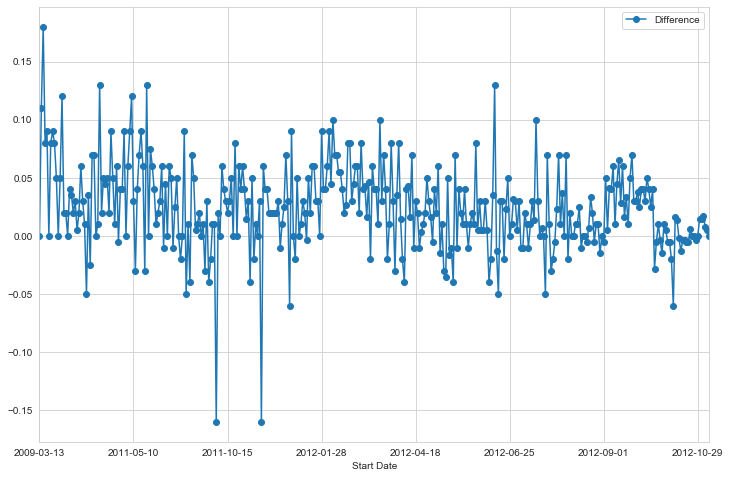

In [31]:
poll_df.plot('Start Date','Difference',figsize=(12,8),marker='o',linestyle='-')

From the graph. Value above 0 means people were more in favour of Obama and negative means people were in favor of Romney

From the graph it is also interesting to note that something happened before and after 15th oct, that sentiment for Romney increased as people's polls favoured him. From google we notice that there were debates on Oct 3rd oct11th and Oct 22nd

In [32]:
row_in = 0
xlimit = []

for date in poll_df['Start Date']:
    if date[0:7] == '2012-10':
        xlimit.append(row_in)
        row_in += 1
    else:
        row_in += 1
        
print(min(xlimit))
print(max(xlimit))

325
352


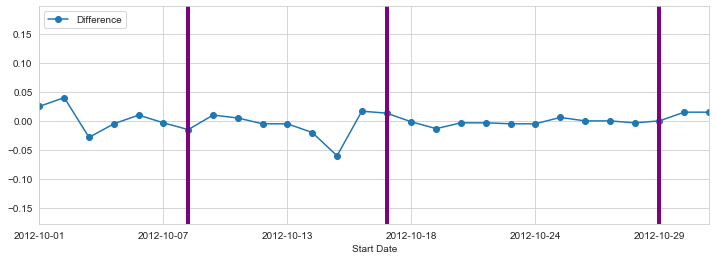

In [36]:
poll_df.plot('Start Date','Difference',figsize=(12,4),marker='o',linestyle='-',xlim=(325,352))

#Oct 3rd
plt.axvline(x=329+2,linewidth=4,color='purple')
#Oct 11th
plt.axvline(x=329+10,linewidth=4,color='purple')
#Oct 22nd
plt.axvline(x=329+21,linewidth=4,color='purple')

Now we have markers at every debate point. After first debate, sentiment for obama increased, after second debate sentiment for Romney increased but after third one, sentiments were even for both obama and Romney